In [236]:
%matplotlib notebook

import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt


In [237]:
path = "2010-2017-NC-County-Population-Estimates_by_year1.csv"
data = pd.read_csv(path, names=["FIPS Code","State and County Names", "April 1 2010 Estimates Base", "July 1 2010 Estimate", "July 1 2011 Estimate", "July 1 2012 Estimate", "July 1 2013 Estimate", "July 1 2014 Estimate","July 1 2015 Estimate", "July 1 2016 Estimate", "July 1 2017 Estimate", "Total_Change"])
data.head(10)

,FIPS Code,State and County Names,April 1 2010 Estimates Base,July 1 2010 Estimate,July 1 2011 Estimate,July 1 2012 Estimate,July 1 2013 Estimate,July 1 2014 Estimate,July 1 2015 Estimate,July 1 2016 Estimate,July 1 2017 Estimate,Total_Change
0,Population Estimates for NC State and Counties...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Source: U.S. Census Bureau, Population Estimat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIPS Code,Geography Name,Total Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,"April 1, 2010 Estimates Base","July 1, 2010 Estimate","July 1, 2011 Estimate","July 1, 2012 Estimate","July 1, 2013 Estimate","July 1, 2014 Estimate","July 1, 2015 Estimate","July 1, 2016 Estimate","July 1, 2017 Estimate",Total Change
5,37000,North Carolina,"9,535,721","9,574,247","9,662,940","9,755,299","9,849,812","9,941,160","10,041,769","10,156,689","10,273,419","737,698"
6,37001,Alamance County,"151,198","151,490","152,857","153,471","154,417","155,698","157,389","159,325","162,391","11,193"
7,37003,Alexander County,"37,192","37,241","37,039","36,940","37,091","37,092","37,058","37,270","37,286",94
8,37005,Alleghany County,"11,154","11,141","11,025","10,956","10,920","10,911","10,869","10,945","11,031",-123
9,37007,Anson County,"26,928","26,851","26,517","26,322","25,975","25,978","25,594","25,119","24,991","-1,937"


In [238]:
drop_data = data.dropna()
drop_data.head()

,FIPS Code,State and County Names,April 1 2010 Estimates Base,July 1 2010 Estimate,July 1 2011 Estimate,July 1 2012 Estimate,July 1 2013 Estimate,July 1 2014 Estimate,July 1 2015 Estimate,July 1 2016 Estimate,July 1 2017 Estimate,Total_Change
5,37000,North Carolina,"9,535,721","9,574,247","9,662,940","9,755,299","9,849,812","9,941,160","10,041,769","10,156,689","10,273,419","737,698"
6,37001,Alamance County,"151,198","151,490","152,857","153,471","154,417","155,698","157,389","159,325","162,391","11,193"
7,37003,Alexander County,"37,192","37,241","37,039","36,940","37,091","37,092","37,058","37,270","37,286",94
8,37005,Alleghany County,"11,154","11,141","11,025","10,956","10,920","10,911","10,869","10,945","11,031",-123
9,37007,Anson County,"26,928","26,851","26,517","26,322","25,975","25,978","25,594","25,119","24,991","-1,937"


In [239]:
drop_data['Total_Change'] = drop_data['Total_Change'].str.replace(',', '')
drop_data['Total_Change'] = pd.to_numeric(drop_data['Total_Change'])
l = drop_data.columns.to_series().groupby(drop_data.dtypes).groups
l

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{dtype('int64'): Index(['Total_Change'], dtype='object'),
 dtype('O'): Index(['FIPS Code', 'State and County Names', 'April 1 2010 Estimates Base',
        'July 1 2010 Estimate', 'July 1 2011 Estimate', 'July 1 2012 Estimate',
        'July 1 2013 Estimate', 'July 1 2014 Estimate', 'July 1 2015 Estimate',
        'July 1 2016 Estimate', 'July 1 2017 Estimate'],
       dtype='object')}

In [240]:
drop_data['April 1 2010 Estimates Base'] = drop_data['April 1 2010 Estimates Base'].str.replace(',', '')
drop_data['April 1 2010 Estimates Base'] = pd.to_numeric(drop_data['April 1 2010 Estimates Base'])
l = drop_data.columns.to_series().groupby(drop_data.dtypes).groups
l

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{dtype('int64'): Index(['April 1 2010 Estimates Base', 'Total_Change'], dtype='object'),
 dtype('O'): Index(['FIPS Code', 'State and County Names', 'July 1 2010 Estimate',
        'July 1 2011 Estimate', 'July 1 2012 Estimate', 'July 1 2013 Estimate',
        'July 1 2014 Estimate', 'July 1 2015 Estimate', 'July 1 2016 Estimate',
        'July 1 2017 Estimate'],
       dtype='object')}

In [241]:
drop_data['July 1 2010 Estimate'] = drop_data['July 1 2010 Estimate'].str.replace(',', '')
drop_data['July 1 2010 Estimate'] = pd.to_numeric(drop_data['July 1 2010 Estimate'])
l = drop_data.columns.to_series().groupby(drop_data.dtypes).groups
l

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{dtype('int64'): Index(['April 1 2010 Estimates Base', 'July 1 2010 Estimate', 'Total_Change'], dtype='object'),
 dtype('O'): Index(['FIPS Code', 'State and County Names', 'July 1 2011 Estimate',
        'July 1 2012 Estimate', 'July 1 2013 Estimate', 'July 1 2014 Estimate',
        'July 1 2015 Estimate', 'July 1 2016 Estimate', 'July 1 2017 Estimate'],
       dtype='object')}

In [242]:
drop_data['July 1 2011 Estimate'] = drop_data['July 1 2011 Estimate'].str.replace(',', '')
drop_data['July 1 2011 Estimate'] = pd.to_numeric(drop_data['July 1 2011 Estimate'])
l = drop_data.columns.to_series().groupby(drop_data.dtypes).groups
l

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{dtype('int64'): Index(['April 1 2010 Estimates Base', 'July 1 2010 Estimate',
        'July 1 2011 Estimate', 'Total_Change'],
       dtype='object'),
 dtype('O'): Index(['FIPS Code', 'State and County Names', 'July 1 2012 Estimate',
        'July 1 2013 Estimate', 'July 1 2014 Estimate', 'July 1 2015 Estimate',
        'July 1 2016 Estimate', 'July 1 2017 Estimate'],
       dtype='object')}

In [243]:
drop_data['July 1 2012 Estimate'] = drop_data['July 1 2012 Estimate'].str.replace(',', '')
drop_data['July 1 2012 Estimate'] = pd.to_numeric(drop_data['July 1 2012 Estimate'])
l = drop_data.columns.to_series().groupby(drop_data.dtypes).groups
l

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{dtype('int64'): Index(['April 1 2010 Estimates Base', 'July 1 2010 Estimate',
        'July 1 2011 Estimate', 'July 1 2012 Estimate', 'Total_Change'],
       dtype='object'),
 dtype('O'): Index(['FIPS Code', 'State and County Names', 'July 1 2013 Estimate',
        'July 1 2014 Estimate', 'July 1 2015 Estimate', 'July 1 2016 Estimate',
        'July 1 2017 Estimate'],
       dtype='object')}

In [244]:
drop_data['July 1 2013 Estimate'] = drop_data['July 1 2013 Estimate'].str.replace(',', '')
drop_data['July 1 2013 Estimate'] = pd.to_numeric(drop_data['July 1 2013 Estimate'])
l = drop_data.columns.to_series().groupby(drop_data.dtypes).groups
l

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{dtype('int64'): Index(['April 1 2010 Estimates Base', 'July 1 2010 Estimate',
        'July 1 2011 Estimate', 'July 1 2012 Estimate', 'July 1 2013 Estimate',
        'Total_Change'],
       dtype='object'),
 dtype('O'): Index(['FIPS Code', 'State and County Names', 'July 1 2014 Estimate',
        'July 1 2015 Estimate', 'July 1 2016 Estimate', 'July 1 2017 Estimate'],
       dtype='object')}

In [245]:
drop_data['July 1 2014 Estimate'] = drop_data['July 1 2014 Estimate'].str.replace(',', '')
drop_data['July 1 2014 Estimate'] = pd.to_numeric(drop_data['July 1 2014 Estimate'])
l = drop_data.columns.to_series().groupby(drop_data.dtypes).groups
l

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{dtype('int64'): Index(['April 1 2010 Estimates Base', 'July 1 2010 Estimate',
        'July 1 2011 Estimate', 'July 1 2012 Estimate', 'July 1 2013 Estimate',
        'July 1 2014 Estimate', 'Total_Change'],
       dtype='object'),
 dtype('O'): Index(['FIPS Code', 'State and County Names', 'July 1 2015 Estimate',
        'July 1 2016 Estimate', 'July 1 2017 Estimate'],
       dtype='object')}

In [246]:
drop_data['July 1 2015 Estimate'] = drop_data['July 1 2015 Estimate'].str.replace(',', '')
drop_data['July 1 2015 Estimate'] = pd.to_numeric(drop_data['July 1 2015 Estimate'])
l = drop_data.columns.to_series().groupby(drop_data.dtypes).groups
l

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{dtype('int64'): Index(['April 1 2010 Estimates Base', 'July 1 2010 Estimate',
        'July 1 2011 Estimate', 'July 1 2012 Estimate', 'July 1 2013 Estimate',
        'July 1 2014 Estimate', 'July 1 2015 Estimate', 'Total_Change'],
       dtype='object'),
 dtype('O'): Index(['FIPS Code', 'State and County Names', 'July 1 2016 Estimate',
        'July 1 2017 Estimate'],
       dtype='object')}

In [247]:
drop_data['July 1 2016 Estimate'] = drop_data['July 1 2016 Estimate'].str.replace(',', '')
drop_data['July 1 2016 Estimate'] = pd.to_numeric(drop_data['July 1 2016 Estimate'])
l = drop_data.columns.to_series().groupby(drop_data.dtypes).groups
l

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{dtype('int64'): Index(['April 1 2010 Estimates Base', 'July 1 2010 Estimate',
        'July 1 2011 Estimate', 'July 1 2012 Estimate', 'July 1 2013 Estimate',
        'July 1 2014 Estimate', 'July 1 2015 Estimate', 'July 1 2016 Estimate',
        'Total_Change'],
       dtype='object'),
 dtype('O'): Index(['FIPS Code', 'State and County Names', 'July 1 2017 Estimate'], dtype='object')}

In [248]:
drop_data['July 1 2017 Estimate'] = drop_data['July 1 2017 Estimate'].str.replace(',', '')
drop_data['July 1 2017 Estimate'] = pd.to_numeric(drop_data['July 1 2017 Estimate'])
l = drop_data.columns.to_series().groupby(drop_data.dtypes).groups
l

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{dtype('int64'): Index(['April 1 2010 Estimates Base', 'July 1 2010 Estimate',
        'July 1 2011 Estimate', 'July 1 2012 Estimate', 'July 1 2013 Estimate',
        'July 1 2014 Estimate', 'July 1 2015 Estimate', 'July 1 2016 Estimate',
        'July 1 2017 Estimate', 'Total_Change'],
       dtype='object'),
 dtype('O'): Index(['FIPS Code', 'State and County Names'], dtype='object')}

In [249]:
drop_data.head()

,FIPS Code,State and County Names,April 1 2010 Estimates Base,July 1 2010 Estimate,July 1 2011 Estimate,July 1 2012 Estimate,July 1 2013 Estimate,July 1 2014 Estimate,July 1 2015 Estimate,July 1 2016 Estimate,July 1 2017 Estimate,Total_Change
5,37000,North Carolina,9535721,9574247,9662940,9755299,9849812,9941160,10041769,10156689,10273419,737698
6,37001,Alamance County,151198,151490,152857,153471,154417,155698,157389,159325,162391,11193
7,37003,Alexander County,37192,37241,37039,36940,37091,37092,37058,37270,37286,94
8,37005,Alleghany County,11154,11141,11025,10956,10920,10911,10869,10945,11031,-123
9,37007,Anson County,26928,26851,26517,26322,25975,25978,25594,25119,24991,-1937


In [250]:
drop_data.dtypes

FIPS Code                      object
State and County Names         object
April 1 2010 Estimates Base     int64
July 1 2010 Estimate            int64
July 1 2011 Estimate            int64
July 1 2012 Estimate            int64
July 1 2013 Estimate            int64
July 1 2014 Estimate            int64
July 1 2015 Estimate            int64
July 1 2016 Estimate            int64
July 1 2017 Estimate            int64
Total_Change                    int64
dtype: object

In [265]:
population_change = drop_data[["State and County Names", "Total_Change"]]
population_change = population_change.set_index("State and County Names")
population_change.head()

,Total_Change
State and County Names,
North Carolina,737698
Alamance County,11193
Alexander County,94
Alleghany County,-123
Anson County,-1937


In [266]:
population_change = population_change.drop(["North Carolina"])
population_change.head()

,Total_Change
State and County Names,
Alamance County,11193
Alexander County,94
Alleghany County,-123
Anson County,-1937
Ashe County,-281


In [289]:
population_change = population_change.sort_values(by="Total_Change", ascending = False)
population_change.head()



,Total_Change
State and County Names,
Wake County,171144
Mecklenburg County,157187
Durham County,41656
Guilford County,38535
Union County,30017


<IPython.core.display.Javascript object>


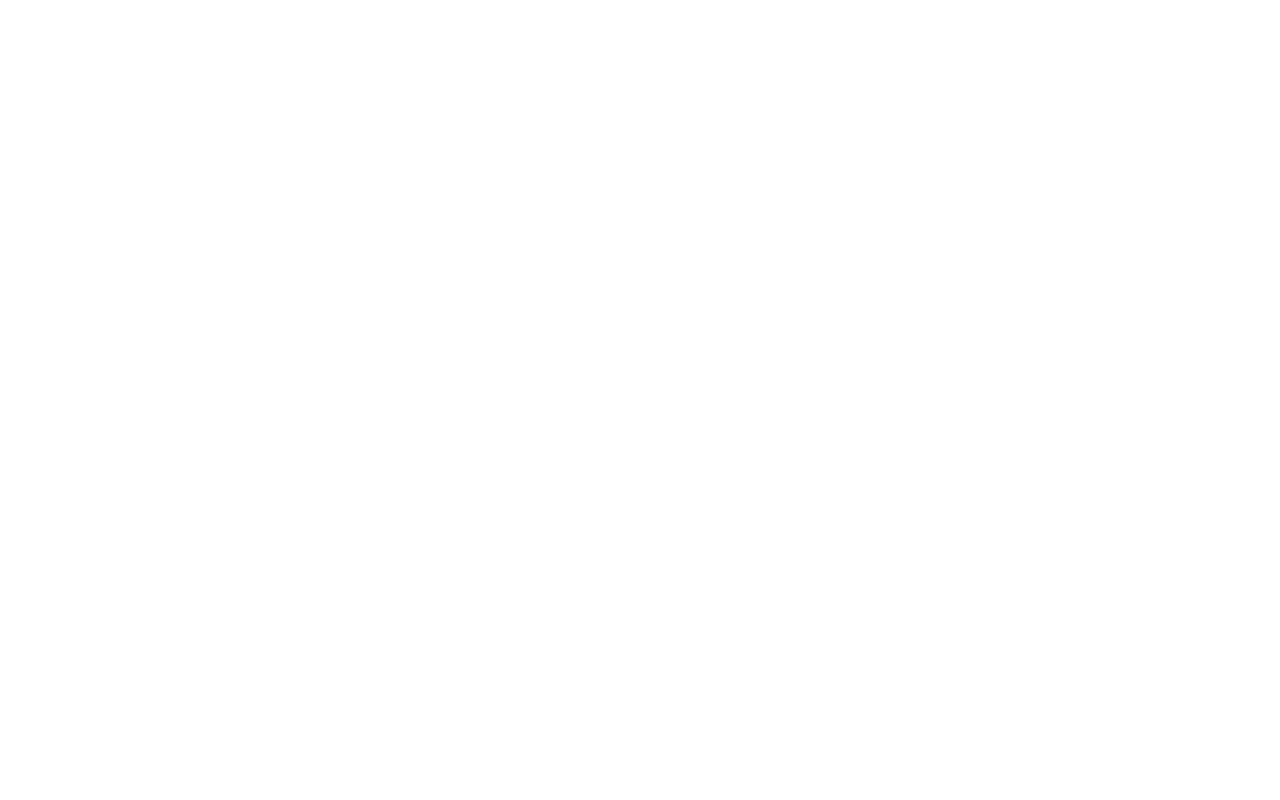

<IPython.core.display.Javascript object>


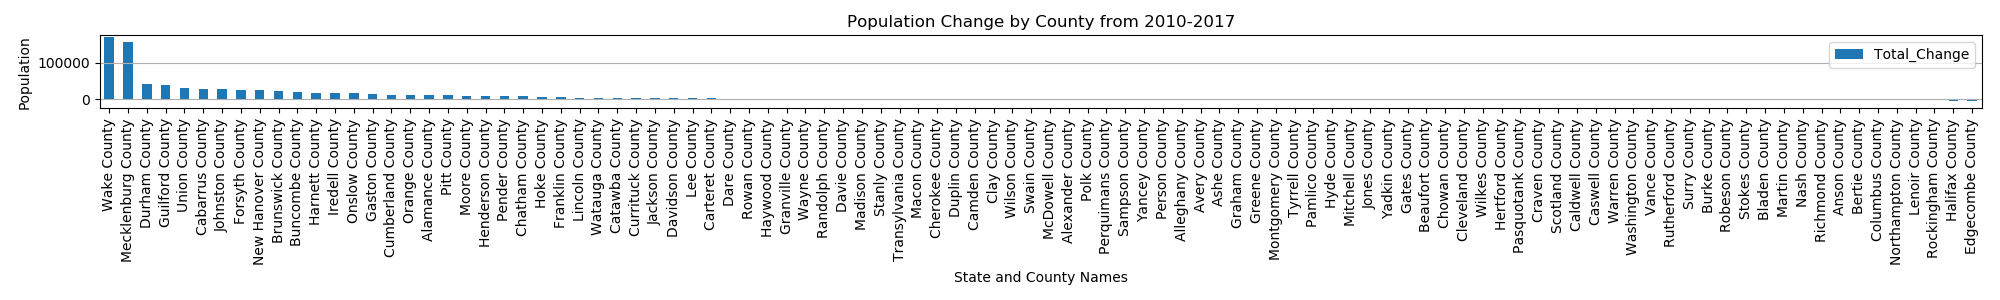

In [313]:
from matplotlib.pyplot import figure
figure(num=1, figsize=(8, 5), dpi=160, facecolor='w', edgecolor='k')

population_change.plot(kind="bar",figsize=(20,3))
plt.title("Population Change by County from 2010-2017")
plt.ylabel("Population")
plt.ylim(-25000, 175000)
plt.gca().yaxis.grid(True)

plt.show()
plt.tight_layout()


plt.savefig('Plot Images/total_population_change.png')


In [298]:
meck_data = drop_data.loc[[65]]
meck_data

,FIPS Code,State and County Names,April 1 2010 Estimates Base,July 1 2010 Estimate,July 1 2011 Estimate,July 1 2012 Estimate,July 1 2013 Estimate,July 1 2014 Estimate,July 1 2015 Estimate,July 1 2016 Estimate,July 1 2017 Estimate,Total_Change
65,37119,Mecklenburg County,919650,923202,944943,968204,991619,1011315,1034442,1057237,1076837,157187


In [198]:
population_change1 = meck_data[["State and County Names", "April 1 2010 Estimates Base", "July 1 2010 Estimate", "July 1 2011 Estimate", "July 1 2012 Estimate","July 1 2013 Estimate", "July 1 2014 Estimate","July 1 2015 Estimate", "July 1 2016 Estimate", "July 1 2017 Estimate"]]
population_change1 = population_change1.set_index("State and County Names")
population_change1.head()

,April 1 2010 Estimates Base,July 1 2010 Estimate,July 1 2011 Estimate,July 1 2012 Estimate,July 1 2013 Estimate,July 1 2014 Estimate,July 1 2015 Estimate,July 1 2016 Estimate,July 1 2017 Estimate
State and County Names,,,,,,,,,
Mecklenburg County,919650,923202,944943,968204,991619,1011315,1034442,1057237,1076837


<IPython.core.display.Javascript object>


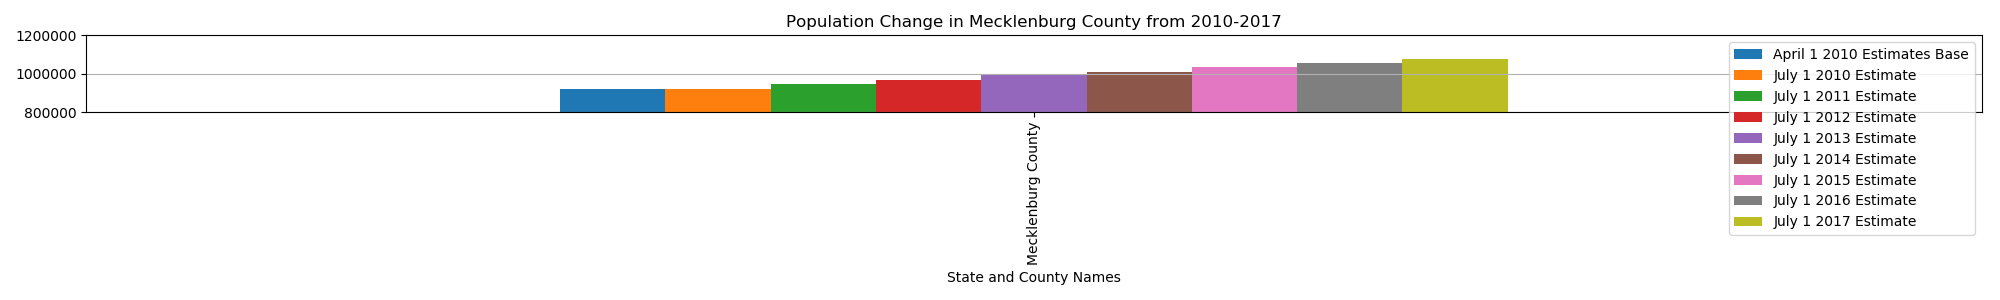

In [323]:
from matplotlib.pyplot import figure
figure(num=1, figsize=(8, 5), dpi=160, facecolor='w', edgecolor='k')

population_change1.plot(kind="bar",figsize=(20,3))
plt.title("Population Change in Mecklenburg County from 2010-2017")
plt.ylim(800000, 1200000)
plt.gca().yaxis.grid(True)
plt.show()
plt.tight_layout()
plt.savefig('Plot Images/meck_pop_change.png')


In [316]:
wake_data = drop_data.loc[[97]]
wake_data


,FIPS Code,State and County Names,April 1 2010 Estimates Base,July 1 2010 Estimate,July 1 2011 Estimate,July 1 2012 Estimate,July 1 2013 Estimate,July 1 2014 Estimate,July 1 2015 Estimate,July 1 2016 Estimate,July 1 2017 Estimate,Total_Change
97,37183,Wake County,901059,906884,929845,952982,974938,998914,1023859,1049143,1072203,171144


In [317]:
population_change2 = wake_data[["State and County Names", "April 1 2010 Estimates Base", "July 1 2010 Estimate", "July 1 2011 Estimate", "July 1 2012 Estimate","July 1 2013 Estimate", "July 1 2014 Estimate","July 1 2015 Estimate", "July 1 2016 Estimate", "July 1 2017 Estimate"]]
population_change2 = population_change2.set_index("State and County Names")
population_change2.head()

,April 1 2010 Estimates Base,July 1 2010 Estimate,July 1 2011 Estimate,July 1 2012 Estimate,July 1 2013 Estimate,July 1 2014 Estimate,July 1 2015 Estimate,July 1 2016 Estimate,July 1 2017 Estimate
State and County Names,,,,,,,,,
Wake County,901059,906884,929845,952982,974938,998914,1023859,1049143,1072203


<IPython.core.display.Javascript object>


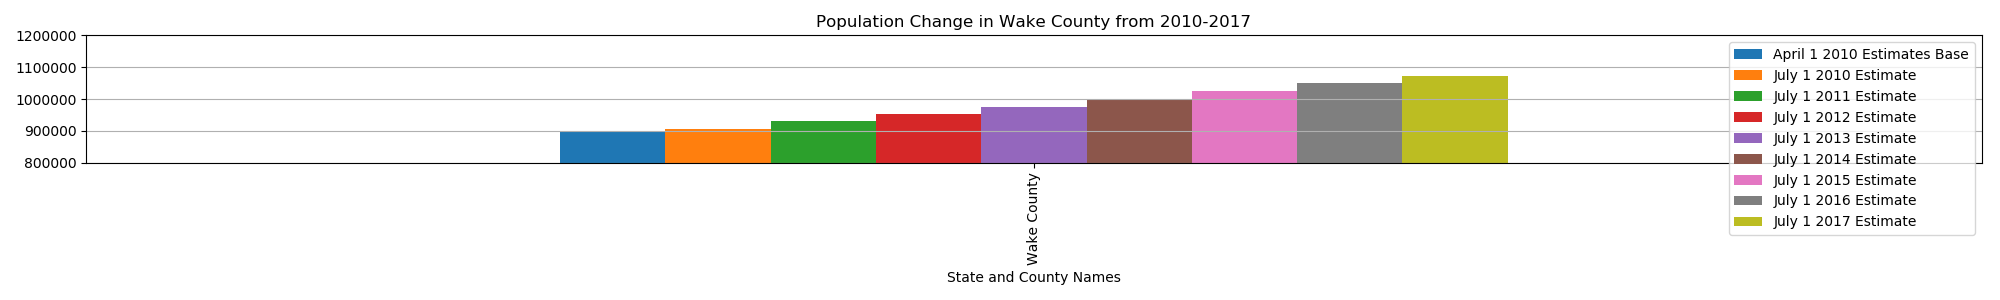

In [324]:
from matplotlib.pyplot import figure
figure(num=1, figsize=(8, 5), dpi=160, facecolor='w', edgecolor='k')

population_change2.plot(kind="bar",figsize=(20,3))
plt.title("Population Change in Wake County from 2010-2017")
plt.ylim(800000, 1200000)
plt.gca().yaxis.grid(True)
plt.show()
plt.tight_layout()
plt.savefig('Plot Images/wake_pop_change.png')


In [174]:
compare_data = drop_data.loc[[65,97]]
compare_data

,FIPS Code,State and County Names,April 1 2010 Estimates Base,July 1 2010 Estimate,July 1 2011 Estimate,July 1 2012 Estimate,July 1 2013 Estimate,July 1 2014 Estimate,July 1 2015 Estimate,July 1 2016 Estimate,July 1 2017 Estimate,Total_Change
65,37119,Mecklenburg County,919650,923202,944943,968204,991619,1011315,1034442,1057237,1076837,157187
97,37183,Wake County,901059,906884,929845,952982,974938,998914,1023859,1049143,1072203,171144


In [175]:
col_to_drop = ["FIPS Code", "Total_Change"]
col_to_drop

['FIPS Code', 'Total_Change']

In [176]:
compare_data = compare_data[compare_data.columns.drop(col_to_drop)]
compare_data

,State and County Names,April 1 2010 Estimates Base,July 1 2010 Estimate,July 1 2011 Estimate,July 1 2012 Estimate,July 1 2013 Estimate,July 1 2014 Estimate,July 1 2015 Estimate,July 1 2016 Estimate,July 1 2017 Estimate
65,Mecklenburg County,919650,923202,944943,968204,991619,1011315,1034442,1057237,1076837
97,Wake County,901059,906884,929845,952982,974938,998914,1023859,1049143,1072203


In [177]:
compare_data.set_index('State and County Names')
compare_data

,State and County Names,April 1 2010 Estimates Base,July 1 2010 Estimate,July 1 2011 Estimate,July 1 2012 Estimate,July 1 2013 Estimate,July 1 2014 Estimate,July 1 2015 Estimate,July 1 2016 Estimate,July 1 2017 Estimate
65,Mecklenburg County,919650,923202,944943,968204,991619,1011315,1034442,1057237,1076837
97,Wake County,901059,906884,929845,952982,974938,998914,1023859,1049143,1072203


<IPython.core.display.Javascript object>


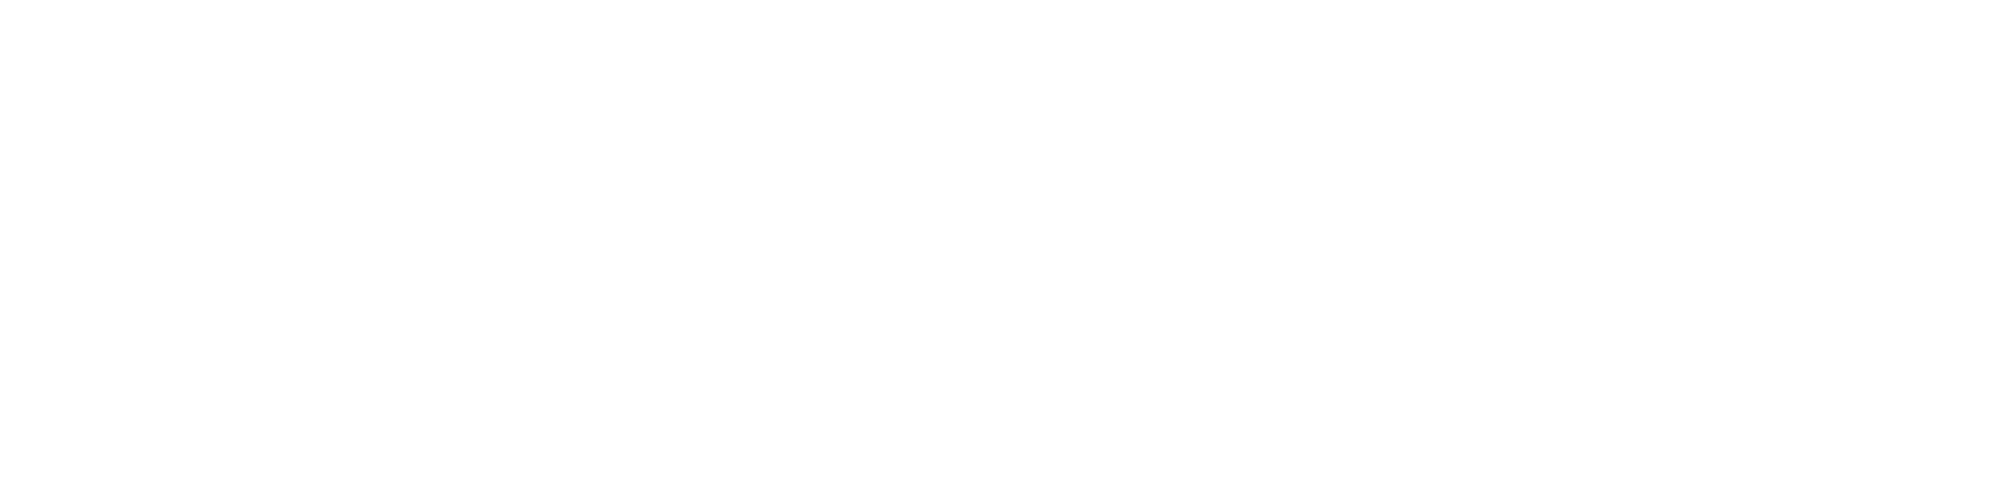

KeyError: 'State and County Names'

In [84]:
multi_plot = population_change2.plot(kind="bar", figsize=(20,5))


multi_plot.set_xticklabels(compare_data["State and County Names"], rotation=45)

plt.show()
plt.tight_layout()